In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as skp
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.ensemble as skemb
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import SVC

In [2]:
breast_canser_data = pd.read_csv('Breast_cancer_dataset.csv',sep=",")

In [3]:
breast_canser_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
breast_canser_data.iloc[:,:10].head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543


In [5]:
breast_canser_data.iloc[:,10:20].head(10)

,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se
0,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587
1,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340
2,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058
3,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867
4,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885
5,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137
6,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039
7,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448
8,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226
9,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432


In [6]:
breast_canser_data.iloc[:,20:].head(10)

,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [134]:
breast_canser_data.diagnosis.value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [8]:
breast_canser_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [9]:
breast_canser_data.drop(columns=['id','Unnamed: 32'],inplace=True)
breast_canser_data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Análisis Exploratorio

In [10]:
X,y = breast_canser_data.drop(columns='diagnosis'), breast_canser_data['diagnosis']
X_train,X_test,y_train,y_test = skms.train_test_split(X,y,test_size=0.30,shuffle=True,random_state=0)

In [11]:
canser_train = pd.concat([X_train,y_train],axis=1)
canser_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
478,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,...,21.90,82.04,467.6,0.1352,0.2010,0.25960,0.07431,0.2941,0.09180,B
303,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842,B
155,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,...,25.22,86.60,564.2,0.1217,0.1788,0.19430,0.08211,0.3113,0.08132,B
186,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.1234,0.2445,0.35380,0.15710,0.3206,0.06938,M
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,...,19.54,50.41,185.2,0.1584,0.1202,0.00000,0.00000,0.2932,0.09382,B


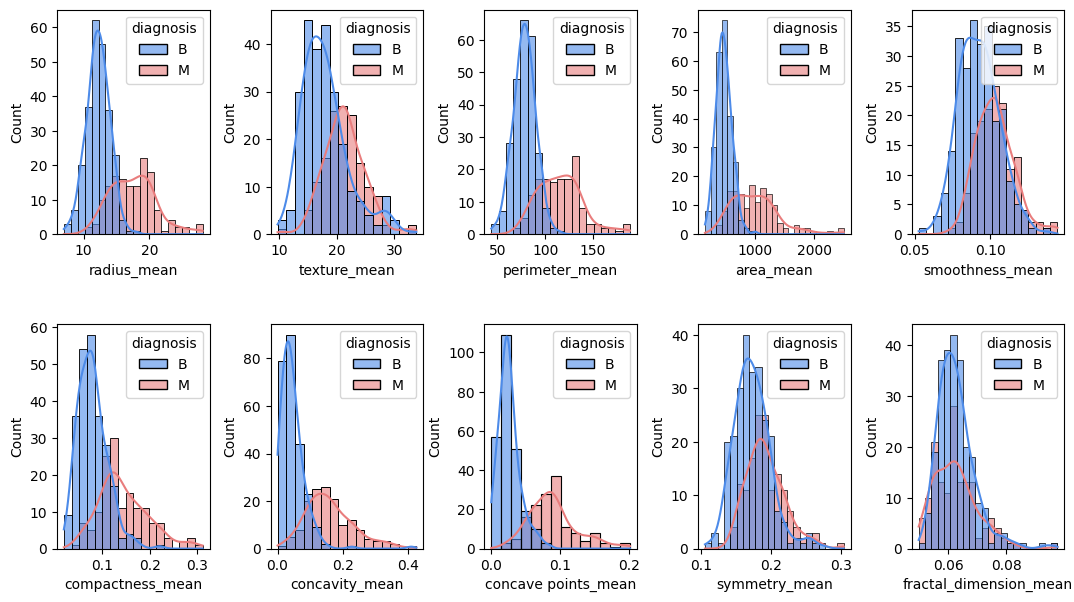

In [12]:
columns_means = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

palette = {
    'M': "#e97d7d",
    'B': "#4d8be9"
}

fig,ax= plt.subplots(nrows=2,ncols=5,figsize=(13,7))
ax= ax.ravel()

for i,col in enumerate(columns_means):
    sns.histplot(data=canser_train,x=col,hue='diagnosis',ax=ax[i],kde=True,alpha=0.6,palette=palette)

plt.subplots_adjust(wspace=.4,hspace=0.4)
plt.show()


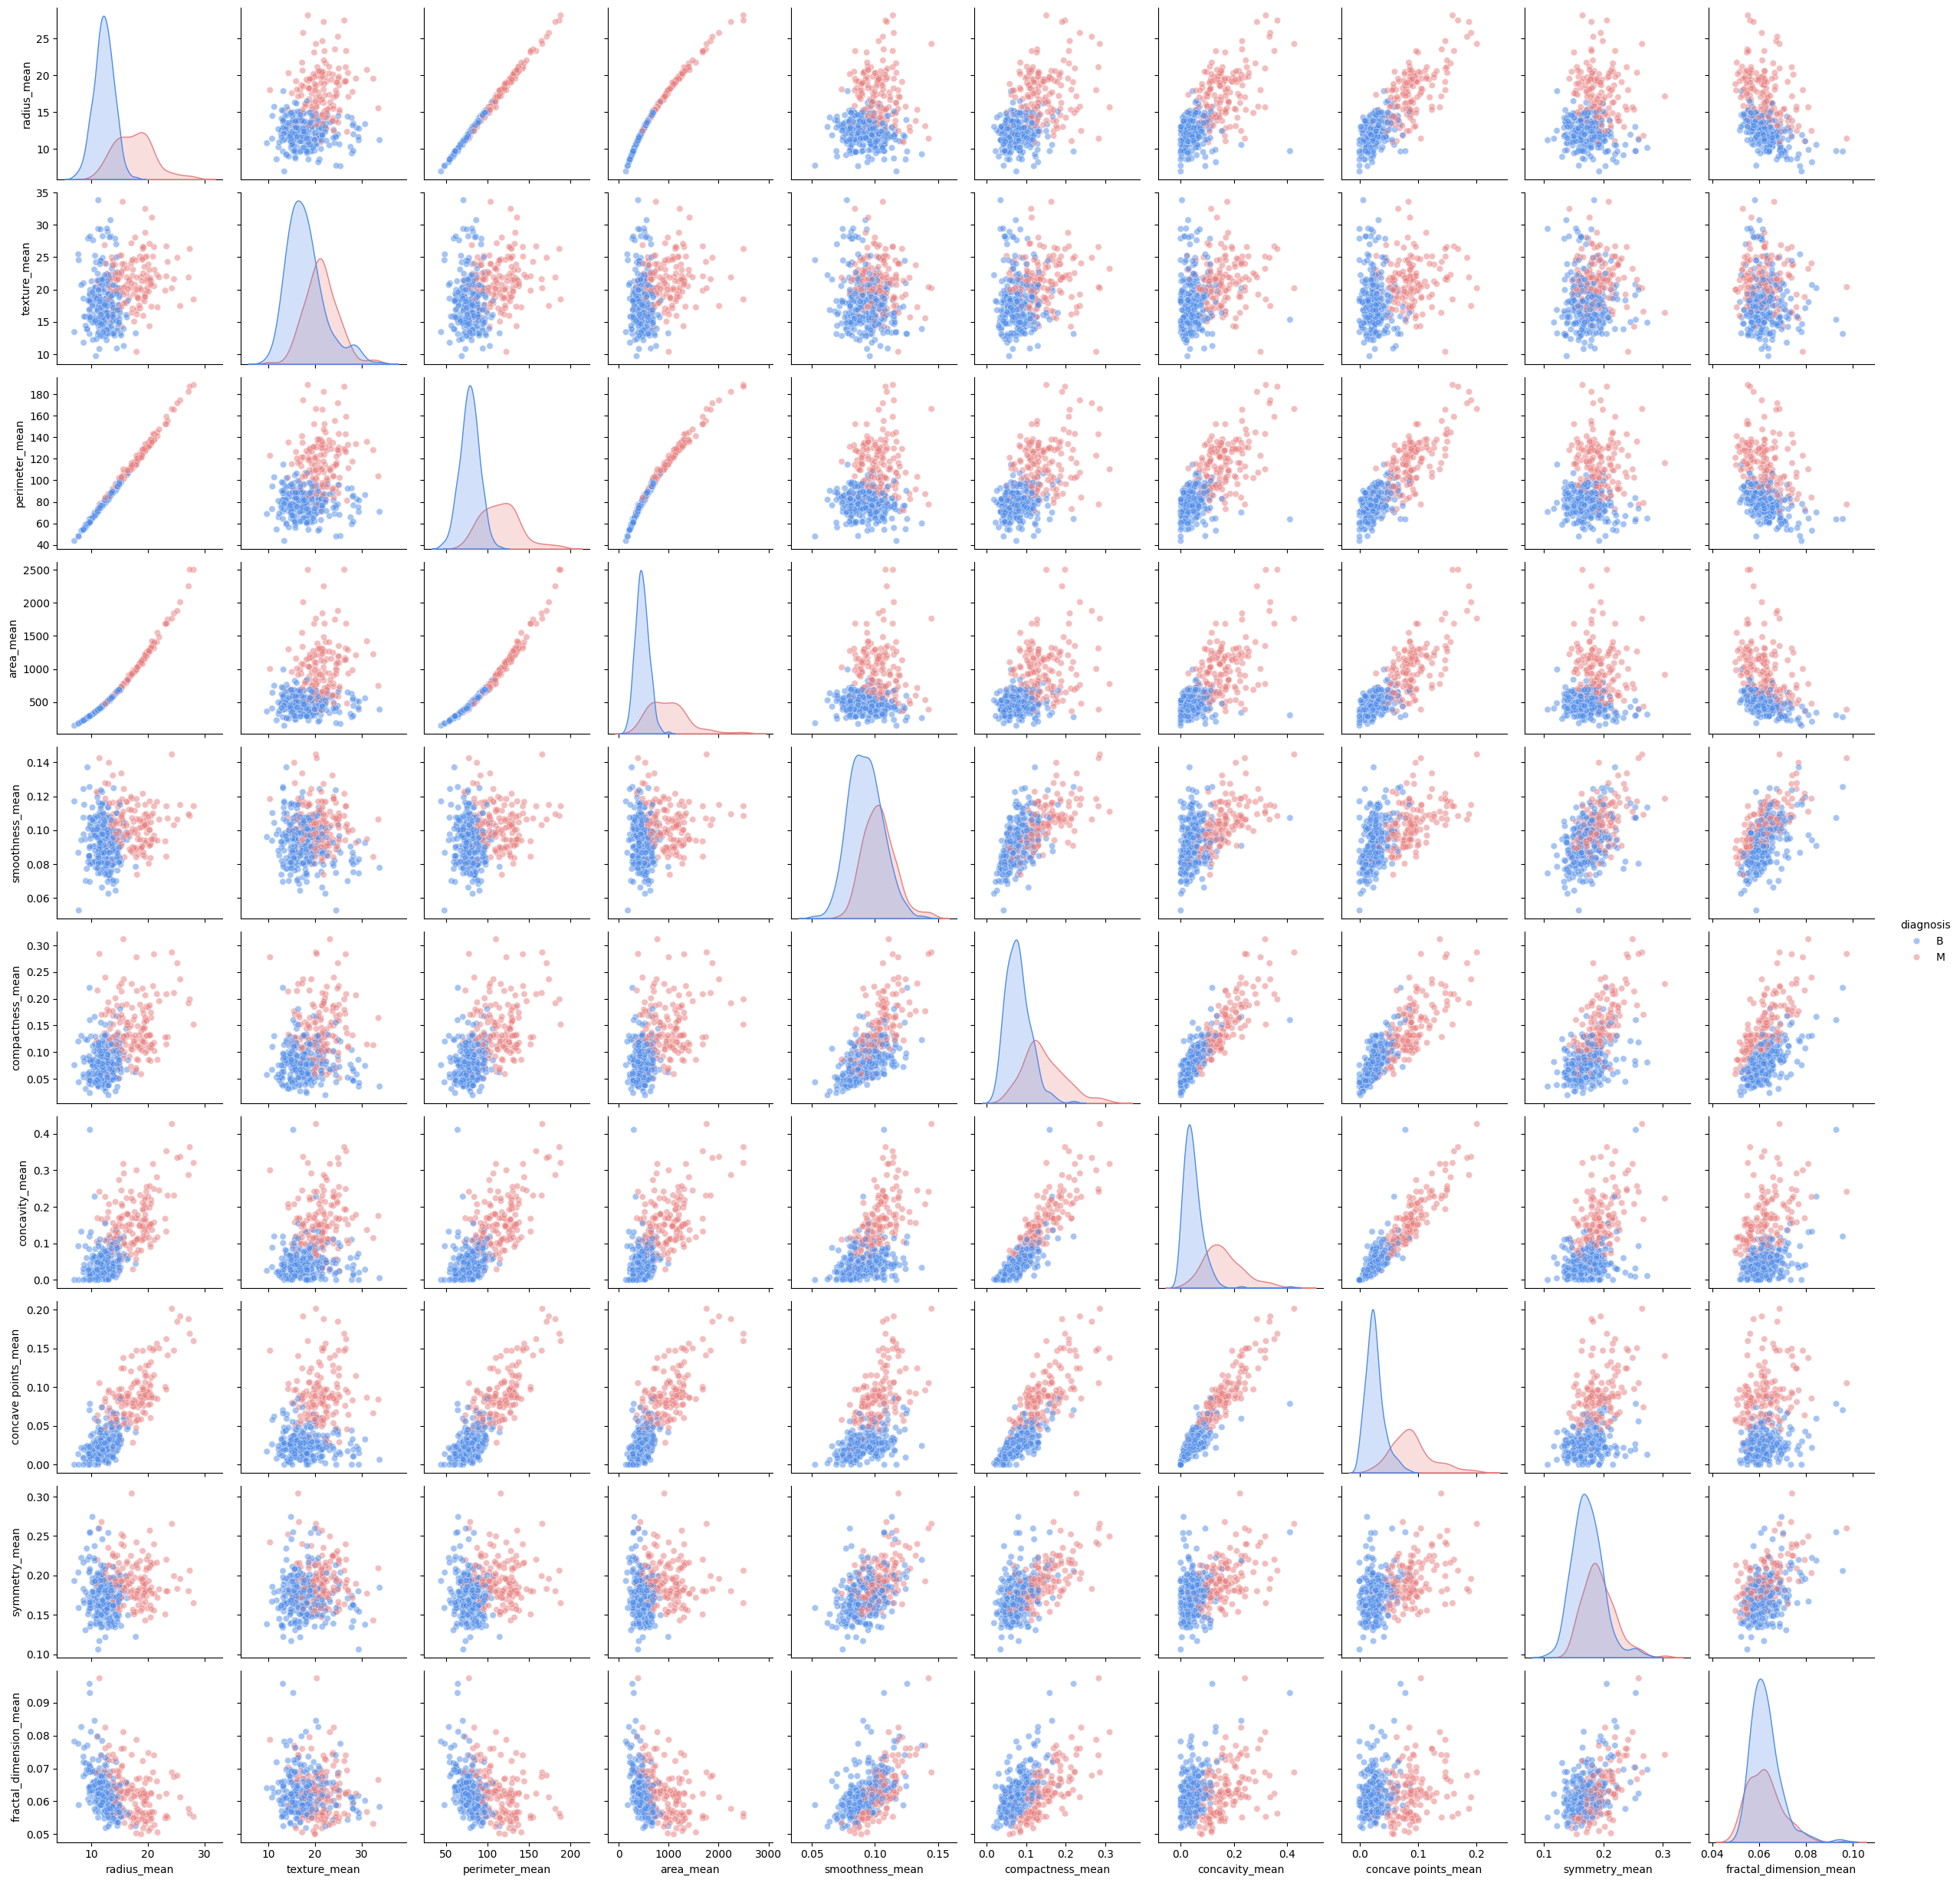

In [25]:
sns.pairplot(canser_train[columns_means + ['diagnosis']],hue='diagnosis',palette=palette,plot_kws={'alpha': 0.5})

plt.show()

# Preprocesamiento

In [54]:
scaler = skp.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
feature_names = X.columns
feature_names

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Entrenar Modelos

In [26]:
import math
m  = X_train.shape[0]
num_nodos_max = math.ceil(np.log2(m))
num_nodos_max

9

In [116]:
param_grid = {
    'max_depth': np.arange(2,num_nodos_max+1,dtype=np.int16)
}
cv = 5
grid_tree = skms.GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid=param_grid,
    scoring='accuracy',
    cv= cv,
    n_jobs=-1)

grid_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9], dtype=int16)},
             scoring='accuracy')

In [117]:
results = grid_tree.cv_results_
grid_tree.best_estimator_

DecisionTreeClassifier(max_depth=np.int16(4), random_state=0)

In [118]:
def intervalos_confianza(grid_model,df,confidence=0.95):

    from scipy import stats
    means = grid_model.cv_results_['mean_test_score']
    stds = grid_model.cv_results_['std_test_score']
    lower,upper = [],[]
    for i in range(means.shape[0]):

        intervalo = stats.t.interval(
            confidence=confidence,
            df=df,
            loc=means[i],
            scale=stds[i]
        )
        lower.append(intervalo[0])
        upper.append(intervalo[1])
    return lower,upper,means

In [119]:
lower,upper,means = intervalos_confianza(grid_tree,cv-1,0.95)

In [122]:
def plot_accuracy(lower,upper,means,hiperparam,name_hiperparam,ylim=(0.8,1)):
    
    plt.style.use('ggplot')
    fig,ax= plt.subplots()

    ax.plot(hiperparam,means,marker='.')
    ax.fill_between(hiperparam,lower, upper,color="#0e34dbc1",alpha=.3)


    ax.set_ylim(ylim[0],ylim[1])
    ax.set_title('Accuracy + IC del 95%')
    ax.set_xlabel(name_hiperparam)
    ax.set_ylabel('Accuracy')
    for x,y in zip(hiperparam,means):
        ax.text(x-0.5,y+.005,f'{y:.3f}',fontsize=7)
    plt.show()

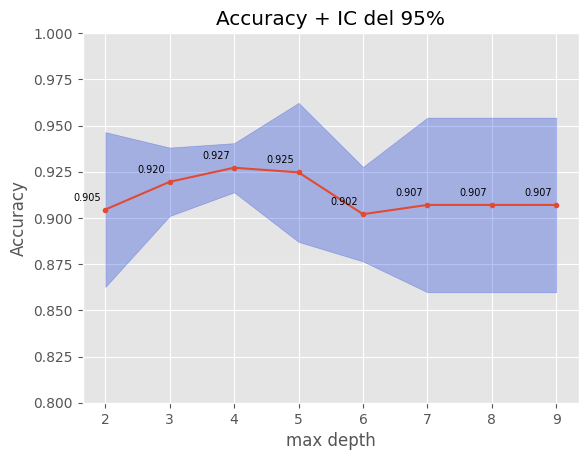

In [123]:
hiperparam = np.arange(2,num_nodos_max+1,dtype=np.int16)
plot_accuracy(lower,upper,means,hiperparam=hiperparam,name_hiperparam='max depth')

* La profudidad de 2 tiene un intervalo de confianza que incluye al mejor accuracy generado por la profunidad de 4

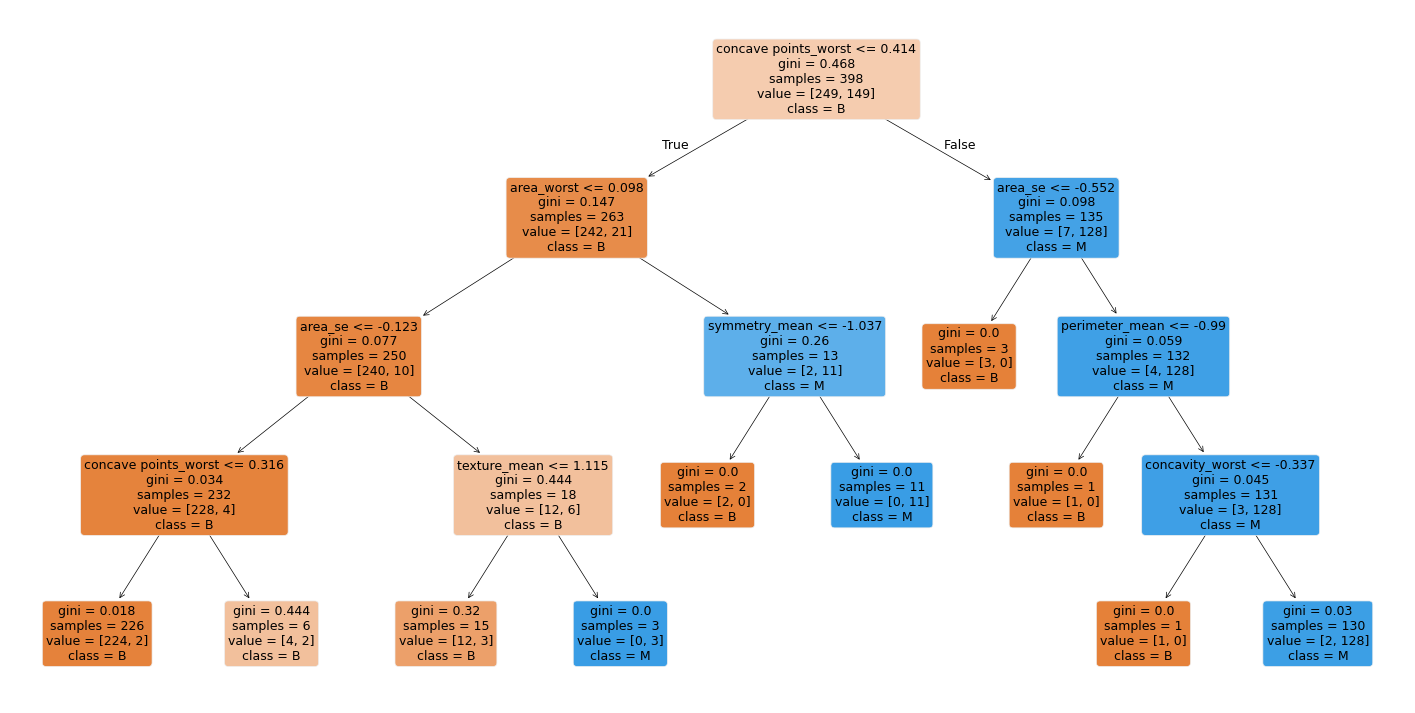

In [125]:
plt.figure(figsize=(18,9))
plot_tree(grid_tree.best_estimator_,
          class_names=['B','M'],
          feature_names=feature_names,
          filled=True,
          rounded=True,
          fontsize=9)
plt.show()

In [76]:

def scores(model,X_test,y_test):
    y_pred = model.predict(X_test)
    print('Accuracy',skm.accuracy_score(y_test,y_pred))
    print('Confusion Matrix\n',skm.confusion_matrix(y_test,y_pred))
    print('Classification Report\n',skm.classification_report(y_test,y_pred))

In [77]:
best_tree  = grid_tree.best_estimator_
scores(best_tree,X_test,y_test)

Accuracy 0.9415204678362573
Confusion Matrix
 [[101   7]
 [  3  60]]
Classification Report
               precision    recall  f1-score   support

           B       0.97      0.94      0.95       108
           M       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



## AdaBoost

In [103]:
ada_clf = skemb.AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=10,
    learning_rate=0.5,
    random_state=42
)

ada_clf.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.5, n_estimators=10, random_state=42)

In [104]:
scores(ada_clf,X_test,y_test)

Accuracy 0.9532163742690059
Confusion Matrix
 [[106   2]
 [  6  57]]
Classification Report
               precision    recall  f1-score   support

           B       0.95      0.98      0.96       108
           M       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [126]:
param_grid = {
    'n_estimators':[10,20,30,50,100],
    #'estimator__max_depth':[2,3,4,5]
}
cv = 5
grid_ada = skms.GridSearchCV(
    skemb.AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,random_state=0),random_state=0,),
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
)



In [127]:
grid_ada.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                                           random_state=0),
                                          random_state=0),
             n_jobs=-1, param_grid={'n_estimators': [10, 20, 30, 50, 100]},
             scoring='accuracy')

In [131]:
lower,upper,means = intervalos_confianza(grid_ada,cv-1,0.95)

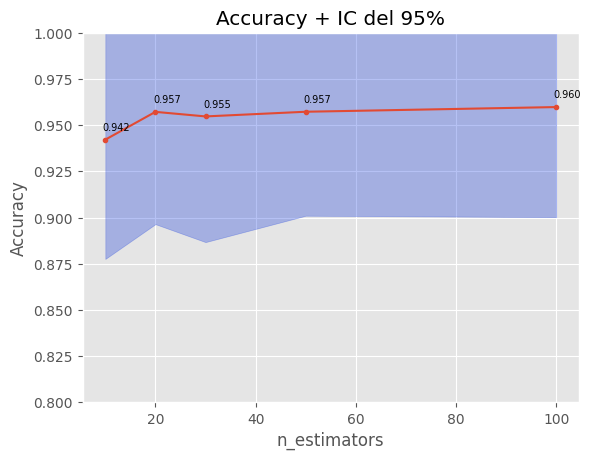

In [ ]:
n_estimators= param_grid['n_estimators']
plot_accuracy(lower,upper,means,n_estimators,'n_estimators')

In [133]:
scores(grid_ada,X_test,y_test)

Accuracy 0.9941520467836257
Confusion Matrix
 [[108   0]
 [  1  62]]
Classification Report
               precision    recall  f1-score   support

           B       0.99      1.00      1.00       108
           M       1.00      0.98      0.99        63

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

